# Practica 5 - Redes neuronales

### Miguel Angel Carvajal

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn
import numpy as np

#### Ejercicio 1
La regla XOR tiene dos entradas (+1 o -1) y la salida es -1 si ambas son diferentes y +1 si ambas son iguales. Utilizar el algoritmo de retropropagación de errores para aprender el XOR en las siguientes arquitecturas (incluir unidades de entrada adicional para simular los umbrales). Comparar el tiempo de convergencia.

### Item a

Se propone una red neuronal con la arquitectura siguiente

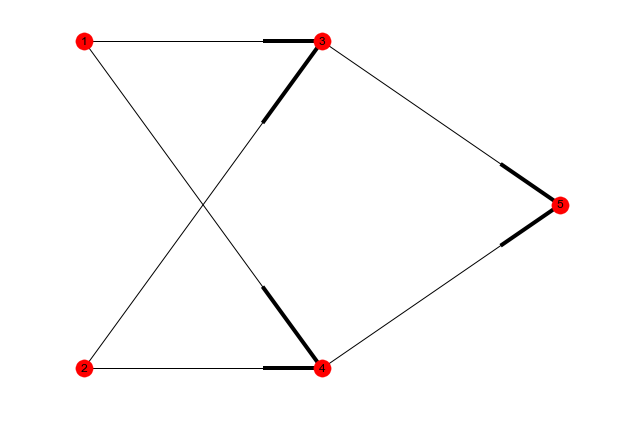

In [159]:
G1 = nx.DiGraph()
layers = ['1','2','3']
G1.add_nodes_from([1,2],layer='1')
G1.add_nodes_from([3,4],layer='2')
G1.add_nodes_from([5],layer='3')
G1.add_edges_from([(1,3),(2,3),(1,4),(2,4),(3,5),(4,5)])
pos = {1:(0,1),2:(0,-1),3:(1,1),4:(1,-1),5:(2,0)} # dictionary with positions
nx.draw(G1, pos= pos)
nx.draw_networkx_labels(G1,pos)
plt.show()

A continuación esta el codigo que construye la arquitectura dada en el item a y aplica el algoritmo de backpropagation para obterner los pesos finales

[[  9.99589432e-01   9.42195616e-01   1.00000000e+00]
 [  9.29048739e-01   2.00316952e-02   1.00000000e+00]
 [  9.28904268e-01   1.98324557e-02   1.00000000e+00]
 [  6.56561897e-02   2.53740931e-05   1.00000000e+00]]
[[ 0.99168132]
 [ 0.00865052]
 [ 0.00864508]
 [ 0.98939733]]
weights
[[-5.22760186 -6.69156809  0.09932496]
 [-5.22541224 -6.68136897 -0.33933036]
 [ 7.79759126  2.79115771 -0.40069065]]
[[-11.00416978]
 [ 11.16790549]
 [  5.25822583]]


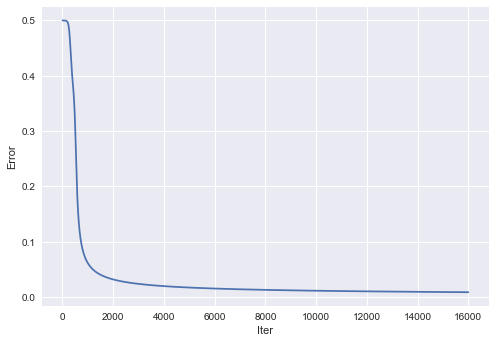

In [75]:
def sigmoid(x, deriv = False):
    if deriv:
        return x*(1-x)
    return 1/(1 + np.exp(-x))


# input data, first and last are the bias
D_in  = np.array([[0,0,1],
                 [0,1,1],
                 [1,0,1],
                 [1,1,1]])
D_out = np.array([[1],[0],[0],[1]])

np.random.seed(2)

syn0 = 2*np.random.random((3,3)) - 1
syn1 = 2*np.random.random((3,1)) - 1

errors = []
# training step
for j in range(16000):
    l0 = D_in
    l1 = sigmoid(np.dot(l0, syn0))
    l1[:,2] = l0[:,2]
    l2 = sigmoid(np.dot(l1, syn1))

    l2_error = D_out - l2
    err = str(np.mean(np.abs(l2_error)))
#     if(j % 100) == 0:
  
#         print ("Error: " + str(err))
    errors.append(err)
    l2_delta = l2_error * sigmoid(l2, deriv = True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid(l1, deriv = True)

    # update weights
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

print(l1)    
print(l2)
print ("weights")
print (syn0)
print  (syn1)
n =  len(errors)
plt.plot(np.linspace(0,1,n)*n, errors)
plt.xlabel("Iter")
plt.ylabel("Error")
plt.show()
errors_a = errors

###### Item b

La arquitectura del item b esta aparece a continuacion

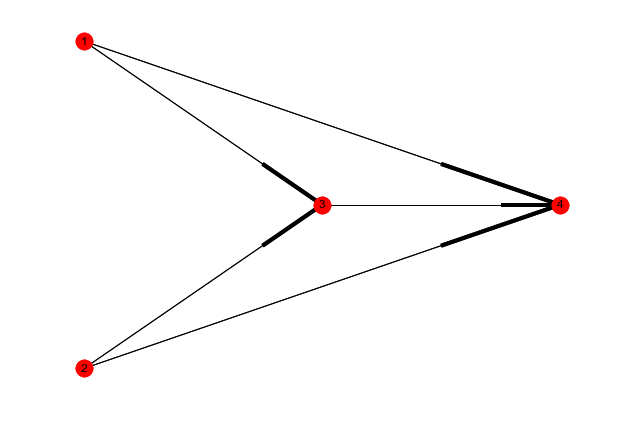

In [155]:
G= nx.DiGraph()
layers = ['1','2','3']
G.add_nodes_from([1,2],layer='1')
G.add_nodes_from([3],layer='2')
G.add_nodes_from([4],layer='3')
G.add_edges_from([(1,3),(2,3),(3,4),(1,4),(2,4)])
pos= {1:(0,1),2:(0,-1),3:(1,0),4:(2,0)}
nx.draw(G, pos= pos)
nx.draw_networkx_labels(G,pos)
plt.show()

A continuación esta el codigo que construye una red con dicha arquitectura 

Error: 0.502133859242
Error: 0.500014718334
Error: 0.499436851038
Error: 0.494782885212
Error: 0.408672856488
Error: 0.241817242618
Error: 0.167654103848
Error: 0.13191740648
Error: 0.11096993037
Error: 0.0970720265824
Error: 0.0870847471174
Error: 0.0795033241588
Error: 0.0735152615328
Error: 0.068641932285
Error: 0.064582129657
Error: 0.0611362460942
Error: 0.0581664022481
Error: 0.0555740656466
Error: 0.0532867983923
Error: 0.0512500540225
Error: 0.0494219057095
Error: 0.0477695477913
Error: 0.0462669087241
Error: 0.0448929823564
Error: 0.0436306361444
Error: 0.0424657436767
Error: 0.0413865424489
Error: 0.0403831510902
Error: 0.0394472014124
Error: 0.0385715544384
Error: 0.0377500787233
Error: 0.0369774754835
Error: 0.0362491393164
Error: 0.0355610462781
Error: 0.034909663204
Error: 0.0342918736783
Error: 0.0337049171653
Error: 0.0331463386313
Error: 0.0326139465895
Error: 0.0321057779571
Error: 0.031620068458
Error: 0.0311552275679
Error: 0.0307098172023
Error: 0.0302825335055
Err

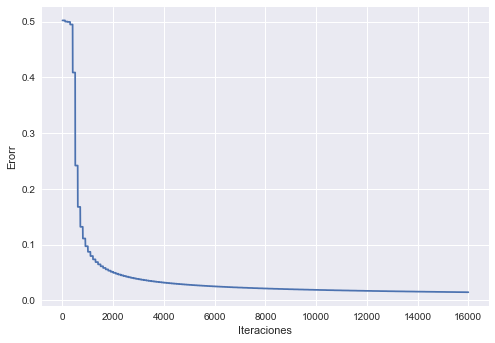

In [74]:
# input data
D_in  = np.array([[0,1,0],
                 [0,1,1],
                 [1,1,0],
                 [1,1,1]])
D_out = np.array([[0],[1],[1],[0]])

np.random.seed(1)

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

errors = []
# training step
for j in range(16000):
    l0 = D_in
    l1 = sigmoid(np.dot(l0, syn0))
    l1[:,0] = l0[:,0]
    l1[:,2] = l0[:,2]
    l1[:,3] = l0[:,1]
    l2 = sigmoid(np.dot(l1, syn1))
    l2_error = D_out - l2

    if(j % 100) == 0:
        err = np.mean(np.abs(l2_error))
        print "Error: " + str(err) 
    errors.append(err)
    l2_delta = l2_error * sigmoid(l2, deriv = True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error* sigmoid(l1, deriv = True)


    # update weights
    syn1 += l1.T.dot(l2_delta)
    #print "l1", l1.shape
    # print "l1_error",l1_error[:,2:3].shape
    # quit()
    #print "sig", sigmoid(l1,de`riv = True).shape
    # print "l1_delta", l1_delta.shape
    #print "shape",l0.shape
    syn0 += l0.T.dot(l1_delta)


print l2
print "weights"
print "Layer1",syn0
print "Layer2",syn1
n = len(errors)

plt.plot(np.linspace(0,1,n)*n, errors)
plt.xlabel("Iteraciones")
plt.ylabel("Erorr")
plt.show()
errors_b = errors


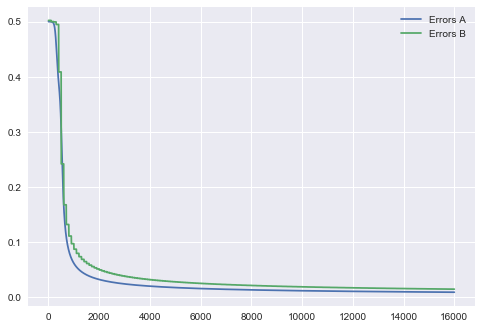

In [76]:
n = len(errors_a)
iterations = np.linspace(0,1,n)*n
plt.plot(iterations, errors_a, label="Errors A")
plt.plot(iterations, errors_b, label="Errors B" )
plt.legend()
plt.show()

### Problema 2

El problema de paridad es una generalización del XOR para N entradas. La salida es +1 si el producto de las N entradas es +1 y -1 si el producto de las entradas es -1. Utilizando retropropagación aprender el problema en la siguiente arquitectura. Que pasa si N′ < N?

In [87]:
N1 = 50
N2  = 60

p = 20 # number of test cases
np.random.seed(1)
# input data, first and last are the bias
D_in  = 2*np.random.randint(0,2,(p,N1)) - 1
D_out = np.empty((p,1))

for i in range(p):
    D_out[i] = (np.prod(D_in[i,:]) + 1)/2

syn0 = 2*np.random.random((N1,N2)) - 1
syn1 = 2*np.random.random((N2,1)) - 1

# training step
for j in range(3000):
    l0 = D_in
    l1 = sigmoid(np.dot(l0, syn0))
    l2 = sigmoid(np.dot(l1, syn1))
    l2_error = D_out - l2
    if(j % 100) == 0:
        print "Error: " + str(np.mean(np.abs(l2_error)))
    l2_delta = l2_error * sigmoid(l2, deriv = True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid(l1, deriv = True)
    # update weights
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
def cleanup(x):
    if (x < 0.1): return 0
    if (x > 0.9): return 1
f= np.vectorize(cleanup)    
print(f(l2))
print(D_out)

Error: 0.471123734219
Error: 0.00241236336049
Error: 0.00206176430508
Error: 0.00188884124559
Error: 0.00177151069056
Error: 0.00168306434654
Error: 0.0016126597167
Error: 0.00155459769209
Error: 0.00150546783753
Error: 0.00146306343261
Error: 0.00142587807335
Error: 0.00139284161106
Error: 0.00136316964244
Error: 0.0013362723589
Error: 0.00131169670176
Error: 0.00128908824999
Error: 0.00126816531922
Error: 0.00124870089318
Error: 0.00123050973318
Error: 0.00121343900027
Error: 0.00119736131471
Error: 0.00118216954017
Error: 0.00116777280998
Error: 0.00115409346206
Error: 0.00114106464796
Error: 0.00112862844847
Error: 0.00111673437448
Error: 0.00110533816373
Error: 0.00109440080729
Error: 0.00108388775596
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]]
[[ 0.000]
 [ 1.000]
 [ 0.000]
 [ 0.000]
 [ 1.000]
 [ 0.000]
 [ 1.000]
 [ 1.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 0.000]
 [ 1.000]
 [ 1.000]
 [ 0.000]
 [ 1.000]
 [ 1.000]
 [ 1.000]
 [ 

Para N' < N no se observó ningun cambio en la respuesta de la red.

### Problema 3

Aprender utilizando retropropagación el mapeo logítico $x(t + 1) = 4x(t)(1 − x(t))$ en la siguiente arquitectura. La función de activación. Presentar 100 ejemplos y luego testear para ejemplos no presentados. Comparar el error de entrenamiento con el error de generalización.

(100, 1)


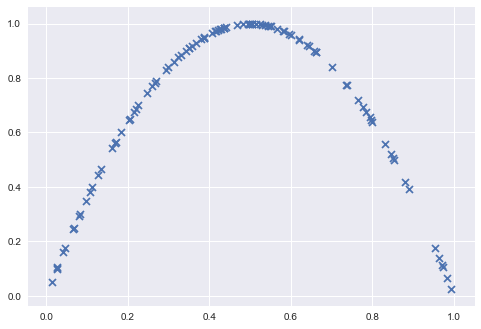

Error: 2.39152852661
Error: 0.251520126163
Error: 0.244798999831
Error: 0.235004788992
Error: 0.219615825297
Error: 0.195467886205
Error: 0.160333344742
Error: 0.116837421351
Error: 0.0747219909244
Error: 0.0438498241693
Error: 0.0268365505417
Error: 0.0205664535642
Error: 0.0197992230816
Error: 0.0192532200528
Error: 0.0185719720081
Error: 0.0178103664749
Error: 0.0170609771325
Error: 0.0163682114245
Error: 0.0158649975496
Error: 0.0154590922963
Error: 0.015127163965
Error: 0.0148498441175
Error: 0.0146384356092
Error: 0.0144602762953
Error: 0.0143160564946
Error: 0.0142013188639
Error: 0.0141372068763
Error: 0.0140813189084
Error: 0.0140281645164
Error: 0.0139775150191


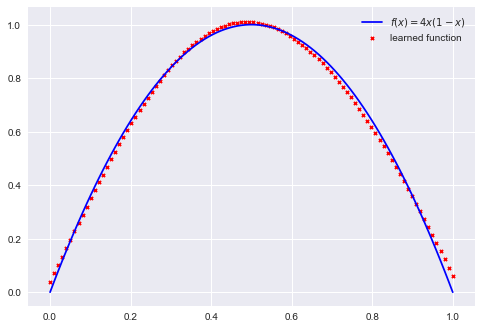

In [153]:
def lineal(x, deriv = False):
    if deriv:
        return 1
    return x


N1 = 1
N2  = 50

p = 100 # number of test cases
np.random.seed(2)


# input data, first and last are the bias
x  = np.random.rand(p,N1)
print x.shape
D_in = np.ones((p,2))
D_in[:,-1:]= x

# print (D_in)

D_out = np.empty((p,1))
D_out[:,0] = 4*D_in[:,1]*(1-D_in[:,1] )

plt.scatter(D_in[:,1],D_out[:,0], marker="x")
plt.show()


syn0 = 2*np.random.random((2,N2)) - 1
syn1 = 2*np.random.random((N2,1)) - 1

def evaluate(syn0, syn1, input):
    l0 = input
    l1 = sigmoid(np.dot(l0,syn0))
    l1[:,0] = 1 # bias
    l1[:,1] = l0[:,1]
    l2 = lineal(np.dot(l1,syn1))
    return l2

eta = 0.001
# training step
for j in range(30000):
    l0 = D_in

    l1 = sigmoid(np.dot(l0, syn0))
 
    l1[:,0] = 1 # bias
    l1[:,1] = l0[:,1]
    l2 = lineal(np.dot(l1, syn1))

    l2_error = D_out - l2
    if(j % 1000) == 0:
        print ("Error: " + str(np.mean(np.abs(l2_error))))
    l2_delta = l2_error * lineal(l2, deriv = True)

    l1_error = l2_delta.dot(syn1.T)

    l1_delta = l1_error * sigmoid(l1, deriv = True)

    # update weights
    syn1 += eta*l1.T.dot(l2_delta)
    syn0 += eta*l0.T.dot(l1_delta)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
# print(l2)

x = np.linspace(0,1,100)
D_in = np.ones((100,2))
D_in[:,1]= x
plt.plot(x, 4*x*(1-x),'b',label=r"$f(x) = 4x(1-x)$")
plt.scatter(x, evaluate(syn0,syn1,D_in),marker='x',color='r',label="learned function", s = 10)
plt.legend()
plt.show()

Arriba se muestra la funcion aprendida y por la red neuronal. Se ve que la capacidad de generalizacion es bastante buena con un error mas marcado para valores de x mayores